In [268]:
%matplotlib inline


# Compare ensemble classifiers using resampling

Ensemble classifiers have shown to improve classification performance compare
to single learner. However, they will be affected by class imbalance. This
example shows the benefit of balancing the training set before to learn
learners. We are making the comparison with non-balanced ensemble methods.

We make a comparison using the balanced accuracy and geometric mean which are
metrics widely used in the literature to evaluate models learned on imbalanced
set.


In [269]:
# Authors: Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT

In [270]:
print(__doc__)

Automatically created module for IPython interactive environment


## Load an imbalanced dataset

We will load the UCI SatImage dataset which has an imbalanced ratio of 9.3:1
(number of majority sample for a minority sample). The data are then split
into training and testing.



In [271]:
from sklearn.model_selection import train_test_split
import warnings

# Filter out UserWarning and FutureWarning messages
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [272]:
from imblearn.datasets import fetch_datasets

satimage = fetch_datasets()["satimage"]
X, y = satimage.data, satimage.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

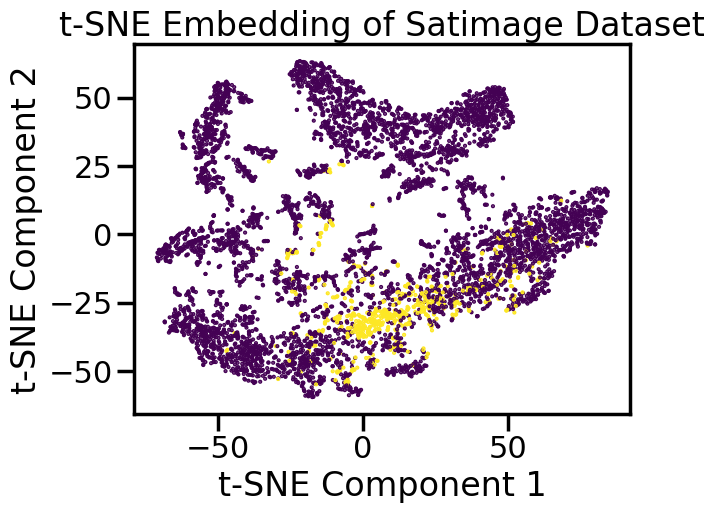

In [273]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Perform t-SNE on the dataset
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Generate scatter plot of t-SNE embedding
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=1)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Embedding of Satimage Dataset')
plt.show()

## Classification using a single decision tree

We train a decision tree classifier which will be used as a baseline for the
rest of this example.

The results are reported in terms of balanced accuracy and geometric mean
which are metrics widely used in the literature to validate model trained on
imbalanced set.



In [274]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [275]:
from sklearn.metrics import balanced_accuracy_score

from imblearn.metrics import geometric_mean_score

print("Decision tree classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_tree):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_tree):.2f}"
)

Decision tree classifier performance:
Balanced accuracy: 0.74 - Geometric mean 0.71


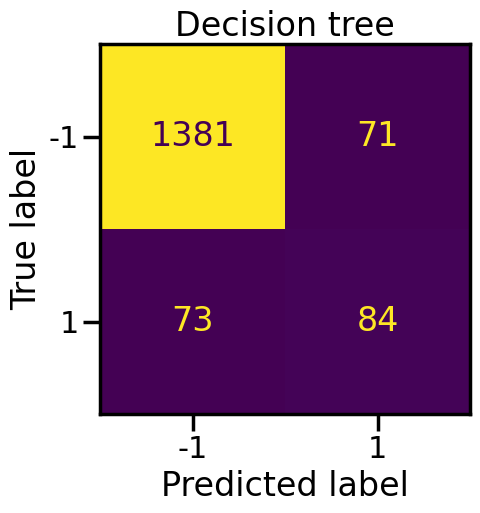

In [276]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

sns.set_context("poster")

disp = ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, colorbar=False)
_ = disp.ax_.set_title("Decision tree")

## Classification using bagging classifier with and without sampling

Instead of using a single tree, we will check if an ensemble of decision tree
can actually alleviate the issue induced by the class imbalancing. First, we
will use a bagging classifier and its counter part which internally uses a
random under-sampling to balanced each bootstrap sample.



In [277]:
from sklearn.ensemble import BaggingClassifier

from imblearn.ensemble import BalancedBaggingClassifier

bagging = BaggingClassifier(n_estimators=50, random_state=0)
balanced_bagging = BalancedBaggingClassifier(n_estimators=50, random_state=0)

bagging.fit(X_train, y_train)
balanced_bagging.fit(X_train, y_train)

y_pred_bc = bagging.predict(X_test)
y_pred_bbc = balanced_bagging.predict(X_test)

Balancing each bootstrap sample allows to increase significantly the balanced
accuracy and the geometric mean.



In [278]:
print("Bagging classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_bc):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_bc):.2f}"
)
print("Balanced Bagging classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_bbc):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_bbc):.2f}"
)

Bagging classifier performance:
Balanced accuracy: 0.73 - Geometric mean 0.68
Balanced Bagging classifier performance:
Balanced accuracy: 0.86 - Geometric mean 0.86


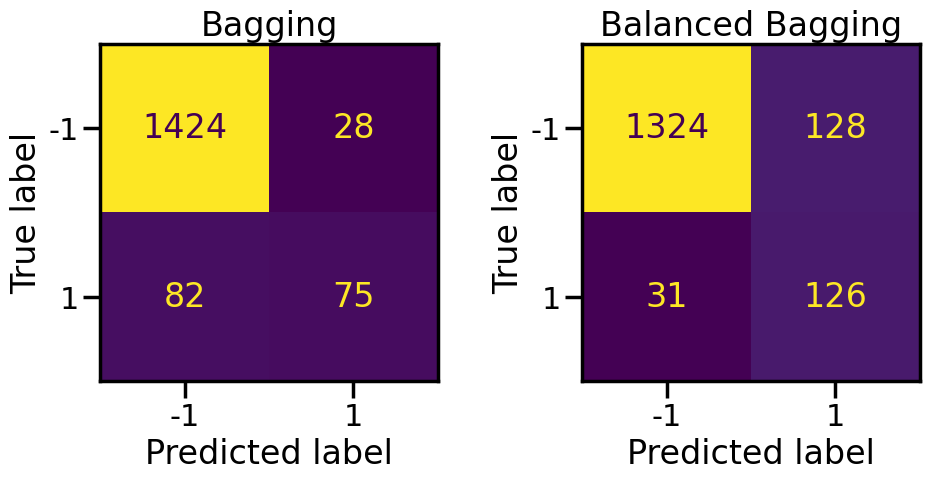

In [279]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
ConfusionMatrixDisplay.from_estimator(
    bagging, X_test, y_test, ax=axs[0], colorbar=False
)
axs[0].set_title("Bagging")

ConfusionMatrixDisplay.from_estimator(
    balanced_bagging, X_test, y_test, ax=axs[1], colorbar=False
)
axs[1].set_title("Balanced Bagging")

fig.tight_layout()

## Classification using random forest classifier with and without sampling

Random forest is another popular ensemble method and it is usually
outperforming bagging. Here, we used a vanilla random forest and its balanced
counterpart in which each bootstrap sample is balanced.



In [280]:
from sklearn.ensemble import RandomForestClassifier

from imblearn.ensemble import BalancedRandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, random_state=0)
brf = BalancedRandomForestClassifier(n_estimators=50, random_state=0)

rf.fit(X_train, y_train)
brf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_brf = brf.predict(X_test)

Similarly to the previous experiment, the balanced classifier outperform the
classifier which learn from imbalanced bootstrap samples. In addition, random
forest outperforms the bagging classifier.



In [281]:
print("Random Forest classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_rf):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_rf):.2f}"
)
print("Balanced Random Forest classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_brf):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_brf):.2f}"
)

Random Forest classifier performance:
Balanced accuracy: 0.73 - Geometric mean 0.68
Balanced Random Forest classifier performance:
Balanced accuracy: 0.88 - Geometric mean 0.88


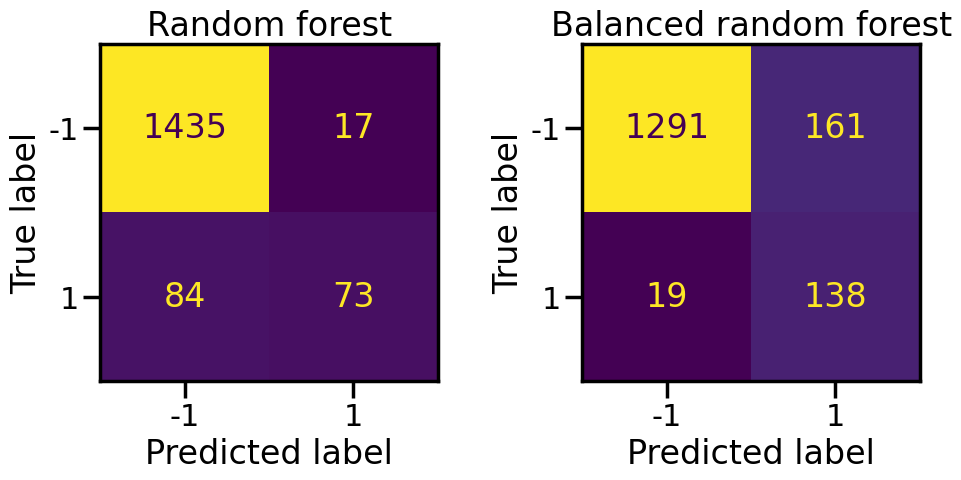

In [282]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=axs[0], colorbar=False)
axs[0].set_title("Random forest")

ConfusionMatrixDisplay.from_estimator(brf, X_test, y_test, ax=axs[1], colorbar=False)
axs[1].set_title("Balanced random forest")

fig.tight_layout()

## Boosting classifier

In the same manner, easy ensemble classifier is a bag of balanced AdaBoost
classifier. However, it will be slower to train than random forest and will
achieve worse performance.



In [283]:
from sklearn.ensemble import AdaBoostClassifier

from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier

estimator = AdaBoostClassifier(n_estimators=10)
eec = EasyEnsembleClassifier(n_estimators=10, estimator=estimator)
eec.fit(X_train, y_train)
y_pred_eec = eec.predict(X_test)

rusboost = RUSBoostClassifier(n_estimators=10, estimator=estimator)
rusboost.fit(X_train, y_train)
y_pred_rusboost = rusboost.predict(X_test)

In [284]:
print("Easy ensemble classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_eec):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_eec):.2f}"
)
print("RUSBoost classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred_rusboost):.2f} - "
    f"Geometric mean {geometric_mean_score(y_test, y_pred_rusboost):.2f}"
)

Easy ensemble classifier performance:
Balanced accuracy: 0.85 - Geometric mean 0.85
RUSBoost classifier performance:
Balanced accuracy: 0.85 - Geometric mean 0.85


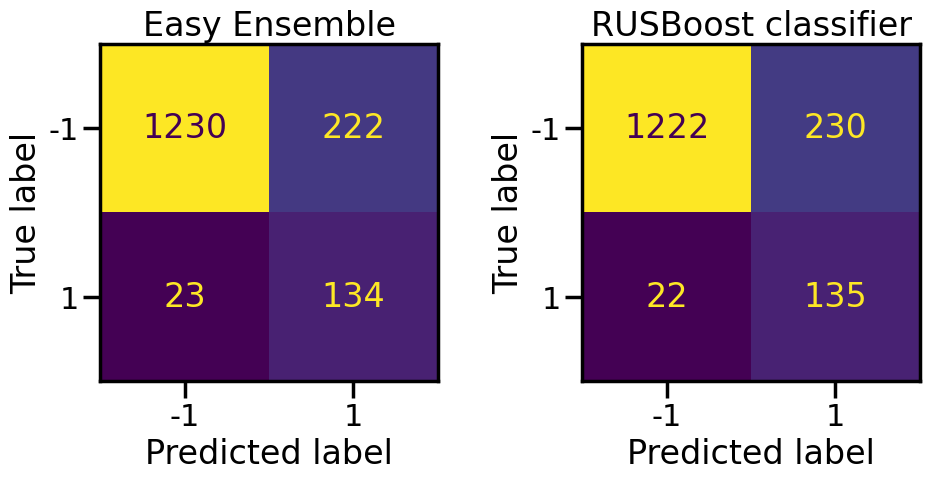

In [285]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

ConfusionMatrixDisplay.from_estimator(eec, X_test, y_test, ax=axs[0], colorbar=False)
axs[0].set_title("Easy Ensemble")
ConfusionMatrixDisplay.from_estimator(
    rusboost, X_test, y_test, ax=axs[1], colorbar=False
)
axs[1].set_title("RUSBoost classifier")

fig.tight_layout()
plt.show()

## Visualization of ensemble methods using t-sne 

In [286]:
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import random
import numpy as np

X = X_tsne
y = y

datasets = [[X,y]]

# create subsets with different sizes
subset_sizes = [1500, 500, 100]
subsets = []
for size in subset_sizes:
    idx = np.random.choice(X.shape[0], size, replace=False)
    X_subset = X[idx]
    y_subset = y[idx]
    subsets.append([X_subset, y_subset])

# append subsets to the datasets list
datasets.extend(subsets)

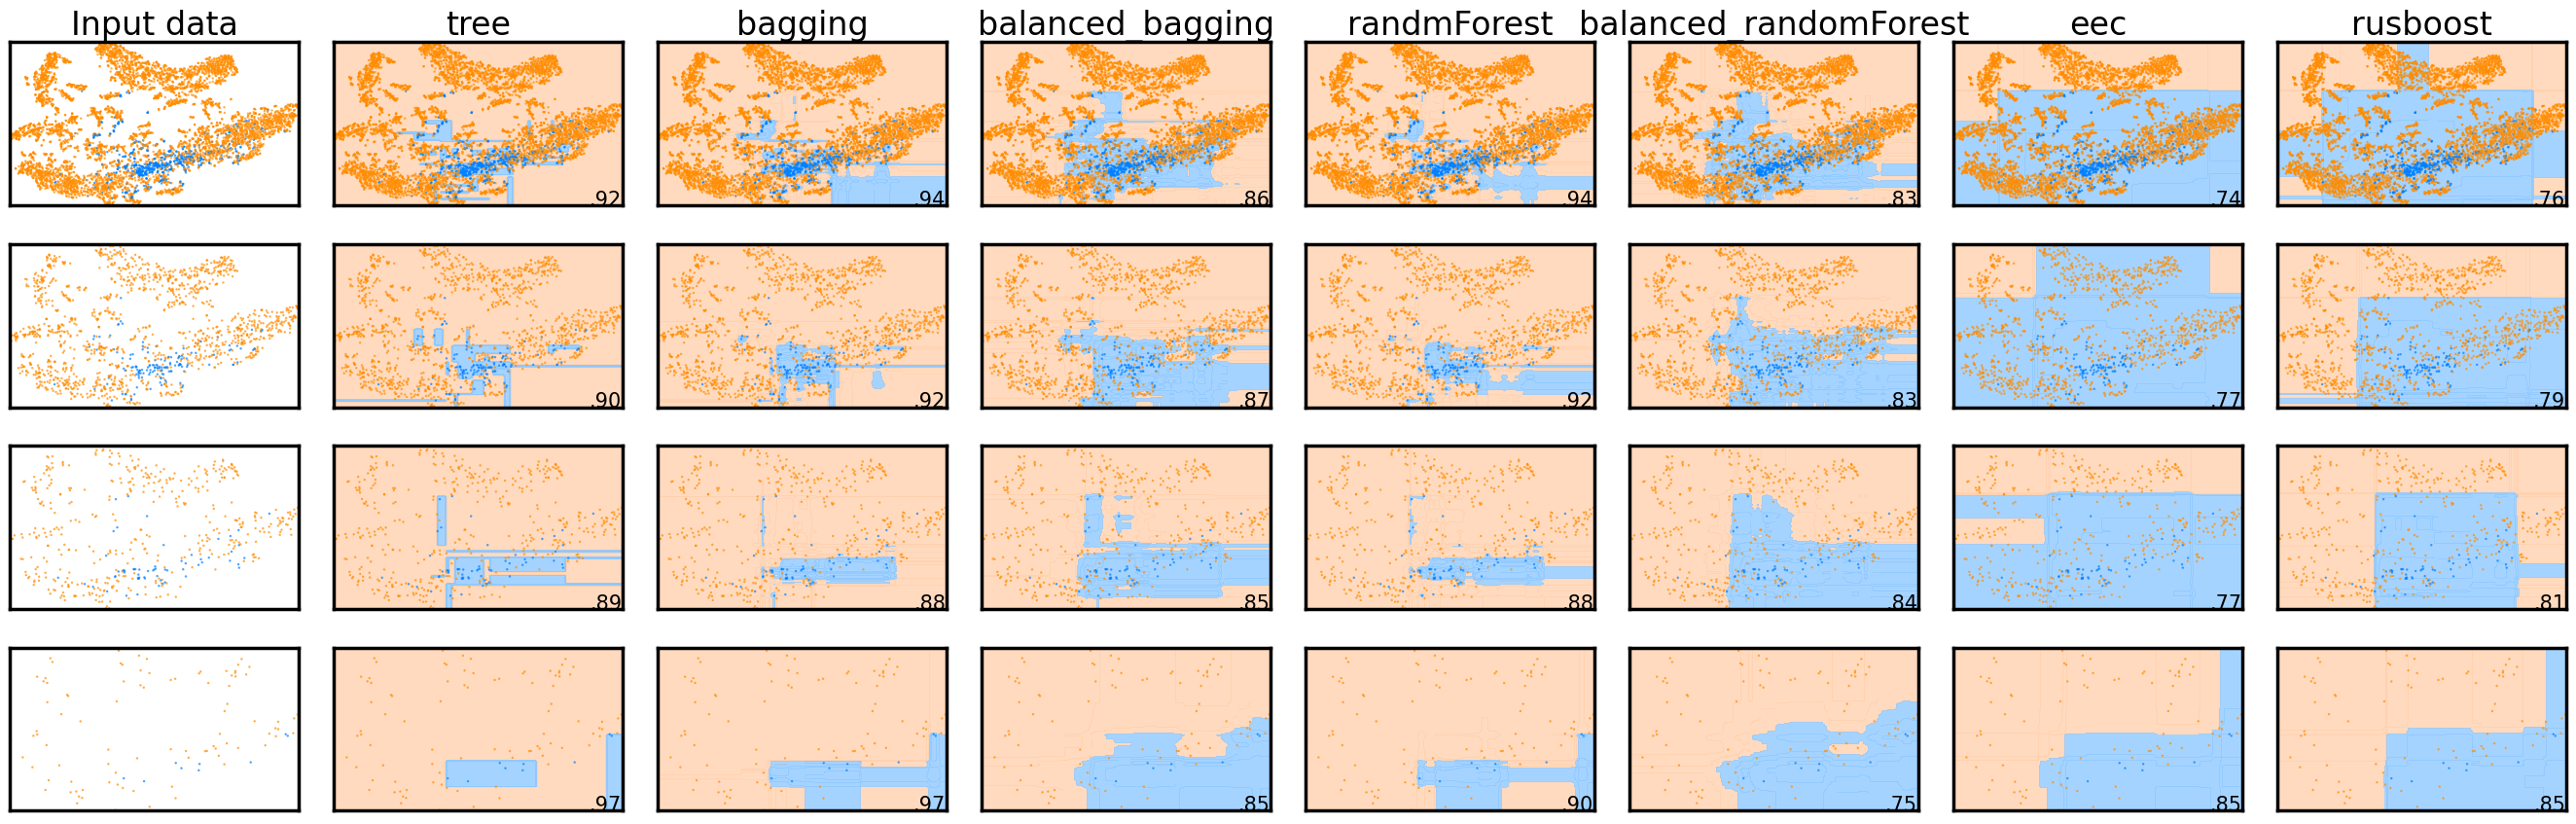

In [288]:
names = ["tree", "bagging", "balanced_bagging", "randmForest", "balanced_randomForest", "eec", "rusboost"]
classifiers = [DecisionTreeClassifier(), bagging, balanced_bagging, rf, brf, eec, rusboost]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part

    X_1, y_1 = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X_1, y_1, test_size=0.4, random_state=42
    )

    x_min, x_max = X_1[:, 0].min() - 0.5, X_1[:, 0].max() + 0.5
    y_min, y_max = X_1[:, 1].min() - 0.5, X_1[:, 1].max() + 0.5

    # just plot the dataset first
    #cm = plt.cm.RdBu
    cm = ListedColormap(['#FFD1AE', '#8FC8FF'])
    cm_bright = ListedColormap(['#FF8C00', '#007FFF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="none", alpha=0.7, s=3)
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="none", alpha=0.7, s=3)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X_1, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="none",alpha=0.7, s=3)
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="none", alpha=0.7, s=3)

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1
plt.tight_layout()
plt.show()
